In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_csv("Mall_Customers.csv")

In [26]:
df.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [27]:
df.shape

(200, 5)

In [28]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [29]:
#Retrive column from from dataframe using "iloc"
X = df.iloc[:, [3,4]].values

In [30]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [31]:
#Finding Optimal no of Clusters using Elbow Method
from sklearn.cluster import KMeans
#Within cluster sum of squares value will be larger if k=1
wcss = []

In [33]:
#Finding optimal value of K using Elbow method
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
#kmeans.inertia_  used to segregate data-ponits into clusters

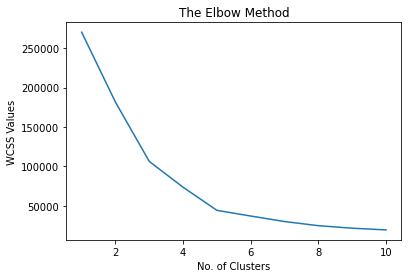

In [34]:
plt.plot(range(1,11), wcss)
plt.title("The Elbow Method")
plt.xlabel("No. of Clusters")
plt.ylabel("WCSS Values")
plt.show()
#getting elbom point at k = 5

In [36]:
#3.Training a model using unsupervisd Learnig algo 

kmeansmodel = KMeans(n_clusters = 5,init='k-means++', random_state=0)

In [38]:
y_kmeans = kmeansmodel.fit_predict(X)

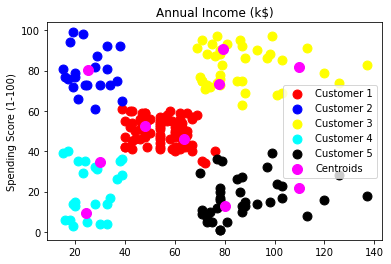

In [41]:
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1], s=80, c = "red", label="Customer 1")
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1], s=80, c = "blue", label="Customer 2")
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,1], s=80, c = "yellow", label="Customer 3")
plt.scatter(X[y_kmeans == 3,0], X[y_kmeans == 3,1], s=80, c = "cyan", label="Customer 4")
plt.scatter(X[y_kmeans == 4,0], X[y_kmeans == 4,1], s=80, c = "black", label="Customer 5")

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'magenta', label = 'Centroids')

plt.title('Clusters of customers')
plt.title('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
